In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv("heart_disease_uci.csv")

In [5]:
dataset

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [7]:
from sklearn.preprocessing import LabelEncoder
dataset[cols] = dataset[cols].apply(LabelEncoder().fit_transform)

In [8]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [9]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy = 'mean', missing_values = np.nan)
imputer=imputer.fit(X[:,5:15])
X[:,5:15]=imputer.transform(X[:,5:15])

In [10]:
X

array([[1.00000000e+00, 6.30000000e+01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 6.70000000e+01, 1.00000000e+00, ...,
        1.00000000e+00, 3.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 6.70000000e+01, 1.00000000e+00, ...,
        1.00000000e+00, 2.00000000e+00, 2.00000000e+00],
       ...,
       [9.18000000e+02, 5.50000000e+01, 1.00000000e+00, ...,
        3.00000000e+00, 6.76375405e-01, 0.00000000e+00],
       [9.19000000e+02, 5.80000000e+01, 1.00000000e+00, ...,
        3.00000000e+00, 6.76375405e-01, 3.00000000e+00],
       [9.20000000e+02, 6.20000000e+01, 1.00000000e+00, ...,
        3.00000000e+00, 6.76375405e-01, 3.00000000e+00]])

In [11]:
y

array([0, 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 3, 4, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0, 3, 1, 3, 0, 4, 0, 0, 0,
       1, 4, 0, 4, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2,
       1, 0, 2, 1, 0, 3, 1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 2, 3,
       1, 1, 0, 2, 2, 0, 0, 0, 3, 2, 3, 4, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 3, 1, 0, 0, 1, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 4,
       3, 1, 1, 1, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 4, 1,
       0, 1, 0, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 3, 1, 2, 0, 3, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 1, 0, 0, 0, 3, 2, 0, 2, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0,
       4, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 2, 4,
       2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 3, 1, 1, 2, 3,

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix
from sklearn.model_selection import ShuffleSplit, cross_val_score

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [14]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [15]:

#Multiple Linear Regression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
y_pred = regressor.predict(X_test_scaled)

In [17]:
mae_linear = mean_absolute_error(y_test, y_pred)

In [18]:
mae_linear

0.6748139051751064

In [19]:
#Polynomial regression
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train_scaled)
X_test_poly = poly_reg.transform(X_test_scaled)

In [20]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

LinearRegression()

In [21]:
y_pred_poly = lin_reg_poly.predict(X_test_poly)

In [22]:
mae_poly = mean_absolute_error(y_test, y_pred_poly)

In [23]:
mae_poly

0.7034747579823369

In [24]:
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train_scaled, y_train)

SVR()

In [25]:
y_pred_svr = svr_regressor.predict(X_test_scaled)

In [26]:
mae_svr = mean_absolute_error(y_test, y_pred_svr)

In [27]:
mae_svr

0.5921614365740752

In [28]:
dtr_regressor = DecisionTreeRegressor(random_state = 5)
dtr_regressor.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=5)

In [29]:
y_pred_dtr = dtr_regressor.predict(X_test_scaled)

In [30]:
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)

In [31]:
mae_dtr

0.7043478260869566

In [32]:
rfr_regressor = RandomForestRegressor(n_estimators = 10, random_state = 5)
rfr_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=10, random_state=5)

In [33]:
y_pred_rfr = rfr_regressor.predict(X_test_scaled)

In [34]:
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)

In [35]:
mae_rfr

0.5726086956521739

In [36]:
classifier_lr = LogisticRegression(random_state = 5)
classifier_lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=5)

In [37]:
y_pred_lr = classifier_lr.predict(X_test_scaled)

In [38]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

In [39]:
cm_lr

array([[89, 14,  2,  1,  0],
       [16, 36,  3,  7,  0],
       [ 5, 17,  3,  8,  1],
       [ 6,  6,  3,  5,  0],
       [ 1,  2,  1,  4,  0]], dtype=int64)

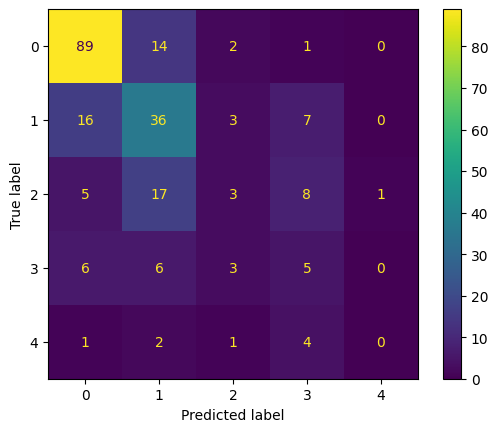

In [40]:
classes = np.unique(y)
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm_lr, display_labels = classes)
disp.plot()
plt.show()

In [41]:
accuracy_score(y_test, y_pred_lr)

0.5782608695652174

In [42]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [43]:
y_pred_knn = classifier_knn.predict(X_test_scaled)

In [44]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

In [45]:
cm_knn

array([[88, 15,  1,  2,  0],
       [16, 41,  2,  3,  0],
       [ 7,  6,  9, 11,  1],
       [ 2,  8,  3,  5,  2],
       [ 1,  4,  1,  1,  1]], dtype=int64)

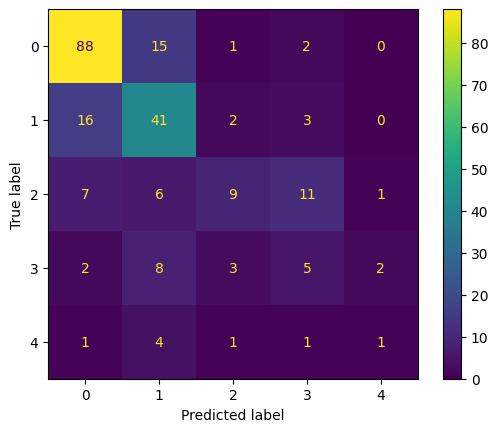

In [46]:
classes = np.unique(y)
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm_knn, display_labels = classes)
disp.plot()
plt.show()

In [47]:
accuracy_score(y_test, y_pred_knn)

0.6260869565217392